# __Demo: Generating Fake Images with Generative Adversarial Networks (GANs)__

# __Steps to Perform__

Step 1: Import the Necessary Libraries

Step 2: Load and Preprocess the Data

Step 3: Build the Generator and Discriminator

Step 4: Compile the Models

Step 5: Train the Models

Step 6: Execute the Training

Step 7: Generate New Images and Evaluate the Model's Performance



# __Step 1: Import the Necessary Libraries__

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Input, Dense, Reshape, Flatten
from tensorflow.keras.models import Sequential
import numpy as np

2025-10-05 10:59:10.370423: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-10-05 10:59:10.434305: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-10-05 10:59:13.671238: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-10-05 10:59:13.721312: I tens

VOC-NOTICE: GPU memory for this assignment is capped at 2048MiB


# __Step 2: Load and Preprocess the Data__

- Load the MNIST dataset and preprocess it.
- Preprocessing involves normalizing the data that can improve models' performance.

In [2]:
# Load MNIST data
(X_train, _), (_, _) = mnist.load_data()
# Normalize to between -1 and 1
X_train = (X_train.astype(np.float32) - 127.5) / 127.5
X_train.shape #(n, h, w, c)

(60000, 28, 28)

In [3]:
X_train = np.expand_dims(X_train, axis=3)
X_train.shape

(60000, 28, 28, 1)

# __Step 3: Build the Generator and Discriminator__

- Define the generator and discriminator models.
- Generator takes a random noise vector as input and outputs an image.
- Discriminator takes an image as input and outputs the probability of the image being real.

In [5]:
# Generator
def create_generator():
    model = Sequential()
    model.add(Dense(256, input_dim=100, activation='relu'))
    model.add(Dense(512, activation='relu'))
    model.add(Dense(1024, activation='relu'))
    model.add(Dense(784, activation='tanh'))
    model.add(Reshape((28, 28, 1)))
    return model

# Discriminator
def create_discriminator():
    model = Sequential()
    model.add(Flatten(input_shape=(28, 28, 1)))
    model.add(Dense(1024, activation='relu'))
    model.add(Dense(512, activation='relu'))
    model.add(Dense(256, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    return model

# __Step 4: Compile the Models__

- Compile the models, which involves defining the loss function and the optimizer.
- The loss function evaluates the model's performance, while the optimizer aims to minimize the loss.

In [6]:
from tensorflow.keras.models import Sequential, Model

# Create and compile the discriminator
discriminator = create_discriminator()
discriminator.compile(loss='binary_crossentropy', optimizer='adam')

# Create and compile the generator
generator = create_generator()
generator.compile(loss='binary_crossentropy', optimizer='adam')

# Create and compile the combined model
discriminator.trainable = False
gan_input = Input(shape=(100,))
x = generator(gan_input)
gan_output = discriminator(x)
gan = Model(inputs=gan_input, outputs=gan_output)
gan.compile(loss='binary_crossentropy', optimizer='adam')

2025-10-05 11:13:25.035513: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-10-05 11:13:25.036968: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-10-05 11:13:25.038103: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

# __Step 5: Train the Models__

- Train the model, which involves feeding data into the models and adjusting the weights of the models based on the output.
- The primary aim is for the generator to create images indistinguishable from real images by the discriminator.

In [8]:
np.ones((3,3))

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [10]:
np.zeros((128,1))

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],

In [11]:
60000/128

468.75

In [15]:
1-np.random.rand(128,1)*0.1

array([[0.97908145],
       [0.9054383 ],
       [0.96819051],
       [0.90727162],
       [0.94130004],
       [0.92255733],
       [0.92762035],
       [0.91829691],
       [0.91733863],
       [0.9067541 ],
       [0.99832862],
       [0.94277998],
       [0.92865629],
       [0.90298298],
       [0.92226276],
       [0.96773936],
       [0.99842188],
       [0.99511606],
       [0.92209528],
       [0.91628959],
       [0.9595913 ],
       [0.93701116],
       [0.97958151],
       [0.93912341],
       [0.944679  ],
       [0.96030781],
       [0.93376325],
       [0.94980444],
       [0.90851337],
       [0.98244251],
       [0.94793277],
       [0.99954843],
       [0.94184019],
       [0.9105173 ],
       [0.9666736 ],
       [0.98096565],
       [0.96755687],
       [0.94133624],
       [0.98883313],
       [0.96394181],
       [0.97574945],
       [0.94181928],
       [0.9521338 ],
       [0.90330797],
       [0.9526561 ],
       [0.93721689],
       [0.98663206],
       [0.900

In [16]:
def train(epochs=3, batch_size=128):
    # Load the data
    (X_train, _), (_, _) = mnist.load_data()
    X_train = (X_train.astype(np.float32) - 127.5) / 127.5
    X_train = np.expand_dims(X_train, axis=3)

    # Labels for the batch size and the test size
    y_train_ones = np.ones((batch_size, 1))
    y_train_zeros = np.zeros((batch_size, 1))
    y_test_ones = np.ones((100, 1))

    # Start training
    for e in range(epochs):
        for i in range(X_train.shape[0] // batch_size):
            # Train Discriminator weights
            discriminator.trainable = True

            # Real samples
            X_batch = X_train[i*batch_size:(i+1)*batch_size]#[0:128:1*128
            d_loss_real = discriminator.train_on_batch(x=X_batch, y=y_train_ones * (1 - 0.1 * np.random.rand(batch_size, 1)))

            # Fake Samples
            z_noise = np.random.normal(loc=0, scale=1, size=(batch_size, 100))
            X_fake = generator.predict_on_batch(z_noise)
            d_loss_fake = discriminator.train_on_batch(x=X_fake, y=y_train_zeros)

            # Discriminator loss
            d_loss = 0.5 * (d_loss_real + d_loss_fake)

            # Train Generator weights
            discriminator.trainable = False
            g_loss = gan.train_on_batch(x=z_noise, y=y_train_ones)

            print(f'Epoch: {e+1}, Batch: {i}, D Loss: {d_loss}, G Loss: {g_loss}')

# __Step 6: Execute the Training__

In [17]:
# Call the train function
train(epochs=50, batch_size=128)

2025-10-05 11:25:12.782428: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7f42f9f9a200 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2025-10-05 11:25:12.782469: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
2025-10-05 11:25:12.788240: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:255] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-10-05 11:25:12.828183: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8902
2025-10-05 11:25:13.002910: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


Epoch: 1, Batch: 0, D Loss: 0.9065954089164734, G Loss: 0.5996946096420288
Epoch: 1, Batch: 1, D Loss: 1.5319864749908447, G Loss: 0.3770087659358978
Epoch: 1, Batch: 2, D Loss: 1.0204374939203262, G Loss: 0.8713287115097046
Epoch: 1, Batch: 3, D Loss: 0.6988593935966492, G Loss: 0.9626674652099609
Epoch: 1, Batch: 4, D Loss: 0.5637899339199066, G Loss: 1.0906956195831299
Epoch: 1, Batch: 5, D Loss: 0.42138390243053436, G Loss: 1.5647811889648438
Epoch: 1, Batch: 6, D Loss: 0.35409702360630035, G Loss: 1.9898808002471924
Epoch: 1, Batch: 7, D Loss: 0.32306383550167084, G Loss: 2.1749675273895264
Epoch: 1, Batch: 8, D Loss: 0.2502126917243004, G Loss: 2.5491161346435547
Epoch: 1, Batch: 9, D Loss: 0.19657878577709198, G Loss: 2.993393898010254
Epoch: 1, Batch: 10, D Loss: 0.17502281069755554, G Loss: 3.1871519088745117
Epoch: 1, Batch: 11, D Loss: 0.15764883905649185, G Loss: 3.114168167114258
Epoch: 1, Batch: 12, D Loss: 0.1599176563322544, G Loss: 3.032334327697754
Epoch: 1, Batch: 13

2025-10-05 11:25:50.488576: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled


Epoch: 4, Batch: 20, D Loss: 0.10014987416320764, G Loss: 12.879034042358398
Epoch: 4, Batch: 21, D Loss: 0.09328309664692824, G Loss: 12.926801681518555
Epoch: 4, Batch: 22, D Loss: 0.10429363290768379, G Loss: 13.139311790466309
Epoch: 4, Batch: 23, D Loss: 0.09897480800896119, G Loss: 12.782103538513184
Epoch: 4, Batch: 24, D Loss: 0.10212939338384786, G Loss: 12.063472747802734
Epoch: 4, Batch: 25, D Loss: 0.09567428812670187, G Loss: 12.011877059936523
Epoch: 4, Batch: 26, D Loss: 0.10081485711225469, G Loss: 11.950011253356934
Epoch: 4, Batch: 27, D Loss: 0.10124579665716738, G Loss: 11.962913513183594
Epoch: 4, Batch: 28, D Loss: 0.10001949958677869, G Loss: 12.035256385803223
Epoch: 4, Batch: 29, D Loss: 0.09874373763341282, G Loss: 12.09211254119873
Epoch: 4, Batch: 30, D Loss: 0.09584649571934278, G Loss: 12.08652400970459
Epoch: 4, Batch: 31, D Loss: 0.09703331689252082, G Loss: 12.06946849822998
Epoch: 4, Batch: 32, D Loss: 0.10150481901882813, G Loss: 12.181730270385742
Ep

2025-10-05 11:32:22.535668: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled


Epoch: 28, Batch: 377, D Loss: 0.09982825827549055, G Loss: 27.27672576904297
Epoch: 28, Batch: 378, D Loss: 0.1038041189312955, G Loss: 38.48646926879883
Epoch: 28, Batch: 379, D Loss: 0.09252041578292848, G Loss: 38.44141387939453
Epoch: 28, Batch: 380, D Loss: 0.10328055173158646, G Loss: 40.049583435058594
Epoch: 28, Batch: 381, D Loss: 0.09618809819221497, G Loss: 39.49931335449219
Epoch: 28, Batch: 382, D Loss: 0.10045073181390762, G Loss: 38.99408721923828
Epoch: 28, Batch: 383, D Loss: 0.0991995856165886, G Loss: 38.39547348022461
Epoch: 28, Batch: 384, D Loss: 0.09992722421884538, G Loss: 37.6920166015625
Epoch: 28, Batch: 385, D Loss: 0.10430442541837694, G Loss: 37.98432540893555
Epoch: 28, Batch: 386, D Loss: 0.09752085804939271, G Loss: 37.83204650878906
Epoch: 28, Batch: 387, D Loss: 0.09535160660743716, G Loss: 37.45651626586914
Epoch: 28, Batch: 388, D Loss: 0.1000340133905411, G Loss: 37.12709045410156
Epoch: 28, Batch: 389, D Loss: 0.09797327220439916, G Loss: 36.4194

2025-10-05 11:34:29.545445: W tensorflow/core/data/root_dataset.cc:286] Optimization loop failed: CANCELLED: Operation was cancelled


Epoch: 36, Batch: 454, D Loss: 0.10256415163776023, G Loss: 17.710012435913086
Epoch: 36, Batch: 455, D Loss: 0.0965671118636875, G Loss: 17.727802276611328
Epoch: 36, Batch: 456, D Loss: 0.09823917115159553, G Loss: 17.713592529296875
Epoch: 36, Batch: 457, D Loss: 0.09799214739513484, G Loss: 17.681079864501953
Epoch: 36, Batch: 458, D Loss: 0.10250323573403985, G Loss: 17.67283058166504
Epoch: 36, Batch: 459, D Loss: 0.10737271152562133, G Loss: 17.711013793945312
Epoch: 36, Batch: 460, D Loss: 0.09951091071675222, G Loss: 17.735698699951172
Epoch: 36, Batch: 461, D Loss: 0.1027861707596065, G Loss: 17.76842498779297
Epoch: 36, Batch: 462, D Loss: 0.09813004200275355, G Loss: 17.77267074584961
Epoch: 36, Batch: 463, D Loss: 0.10090283515802767, G Loss: 17.77252197265625
Epoch: 36, Batch: 464, D Loss: 0.09313994882149945, G Loss: 17.7241268157959
Epoch: 36, Batch: 465, D Loss: 0.10028650886428903, G Loss: 17.694164276123047
Epoch: 36, Batch: 466, D Loss: 0.09792230579902217, G Loss: 

**Notes:**
- Epochs parameter determines how many times the learning algorithm will work through the entire training dataset.
- The `batch_size` is the number of samples that will be propagated through the network at a time.

# __Step 7: Generate New Images and Evaluate the Model's Performance__

- Generate new images and evaluate the performance of the GAN.
- Generate a random noise vector and feed it into the trained generator to create new images.

4/4 [==============================] - 0s 2ms/step


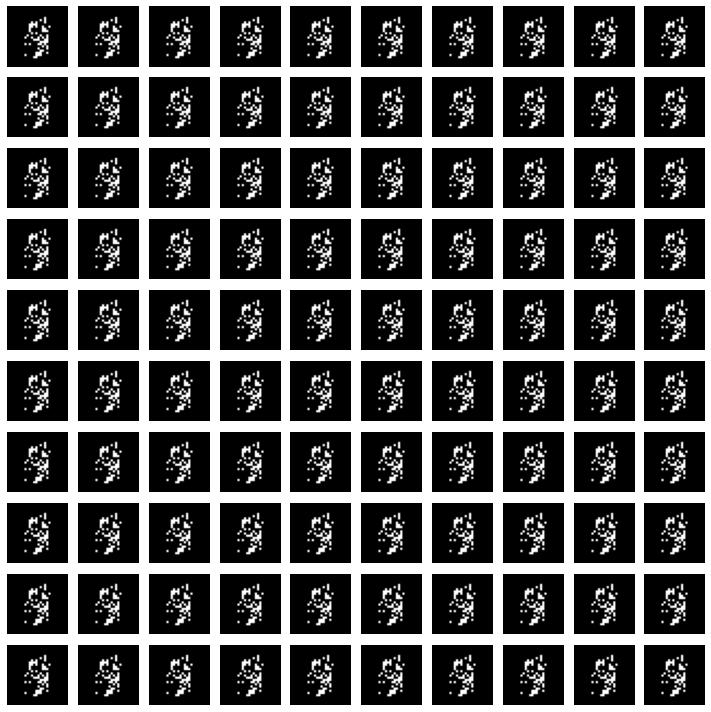

In [18]:
import matplotlib.pyplot as plt
# Generate random noise as an input to initialize the generator
random_noise = np.random.normal(0,1, [100, 100])

# Generate the images from the noise
generated_images = generator.predict(random_noise)

# Visualize the generated images
plt.figure(figsize=(10,10))
for i in range(generated_images.shape[0]):
    plt.subplot(10, 10, i+1)
    plt.imshow(generated_images[i, :, :, 0], cmap='gray')
    plt.axis('off')
plt.tight_layout()
plt.show()

- The resulting plot shows the images generated by the GAN model.

**Notes:**

The output effectively demonstrates how model can generate images resembling handwritten digit 8. However, there is room for improving the quality of these images.

# __Conclusion__

In this demo, you have successfully implemented a GAN to generate images resembling handwritten digits, focusing on the MNIST dataset. The process involved constructing and training a generator and a discriminator. The results were promising, showcasing the GAN's ability to create images similar to the digit **8**, but also highlighted the need for further improvements in image quality.